In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "divy-bike-share-data"

This is an optional Capstone Project (Case Study # 1) from course 8 of Google data analytics Specialization.

This analysis will follows the 6 steps of Data Analysis taught in Google Data Analytics specialization and these steps are : *Ask, Prepare, Process, Analyze, Share and Act.*

# Phase 1: Ask

In the ask step, we will define the problem and objectives and the desired output of our Case Study.

## About the Company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.


Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders.

## Business Objective

Converting casual riders into annual members by analyzing the Cyclistic historic bike trip data.


## Questions to Ask are
  
  * How do annual members and casual riders use           Cyclistict bikes differently?
  * Why would casual riders buy Cyclistic annual memberships?
  * How can Cyclistic use digital media to influennce casual riders to become annual members?
  
## Stakehoders

  * Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations.
  * Lily Moreno: The direcotor of marketing team.
  * Cyclistic Marketing Analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic Marketing strategy.
  * Cyclistic Executive Team: The executive team which will decide to approve the recommended marketing program or not.


# Phase 2: Prepare
In this phase we will talk about the data and it's limitation if any.

The data that I will be using for this case study is Cyclistic's Historical Trip data from last 12 months starting from November 2020 to October 2021. This data is readily available on this [link](https://divvy-tripdata.s3.amazonaws.com/index.html) under the [license](https://www.divvybikes.com/data-license-agreement) provided by Motivate International Inc.


## Is Data ROCCC?

ROCCC approach is used determine whether data is reliable, original, Comprehensive, Current And Cited.

The data is reliable as it represents all the bike rides in city of Chicago that has happened in the duration of our analysis. The data is made available by Motivate International Inc. which operates Divvy bicycle sharing service in Chicago, so data is original. The data is comprehensive is it includes all the information about bike rides, like starting time, ending time, station name, station Id and type of membership. The data is up-to-date as it includes data until end of November 2021. The data is also cited and is availabe under Data License Agreement.

## Data Limitation

By having a quick look at excel files for the twelve months of bike rides shows that there are some names missing for start_station_name and station_ID and also end_station_ID and end_Station_name and by further looking at the type of rides I found out that most of the above information are missing for electric_bike rides.

This limitation will slightly effect our analysis specifically for those stations where most of the rides types are electric.

# Phase 3: Process

In this step we will start cleaning our data, so that when we finally get to analysis phase our data is completely clean of possible errors.

## Tools: 
The tool that I will use for the cleaning purpose is R programming language.I could have used Google spreadsheet or Excel to clean the data as well, but as the data is in great amount, so cleaning process in excel or google spreadsheet will take more time.

In [2]:
# Loading required libraries first
library(tidyverse)
library(ggplot2)
library(readr)
library(dplyr)
library(lubridate)
library(skimr)
library(janitor)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## Organize
Combining all the 12 files will create a huge datasets of over 8 million records, so I will only read 4 files of bike rides and than combine them

In [3]:
# reading the four files one by one
tripdata_202107 <- read_csv("../input/divy-bike-share-data/202107-divvy-tripdata.csv")
tripdata_202108 <- read_csv("../input/divy-bike-share-data/202108-divvy-tripdata.csv")

tripdata_202109 <- read_csv("../input/divy-bike-share-data/202109-divvy-tripdata.csv")
tripdata_202110 <- read_csv("../input/divy-bike-share-data/202110-divvy-tripdata.csv")

# now combining all the four files inot one for further analysis by using bind_rows
all_trips <- bind_rows(tripdata_202107,tripdata_202108,tripdata_202109,tripdata_202110)
head(all_trips)

Rows: 822410 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 804352 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 756147 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.88398,-87.62468,41.89937,-87.64848,casual
B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.90036,-87.69670,41.88990,-87.67147,casual
6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.86038,-87.62581,41.89017,-87.62619,member
379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.90036,-87.69670,41.89456,-87.65345,member
6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.90035,-87.69668,41.88659,-87.65839,casual
62DC2B32872F9BA8,electric_bike,2021-07-29 17:09:08,2021-07-29 17:15:00,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,41.90033,-87.69674,41.91389,-87.70513,casual


## Sampling

Even though we only load 4 months of data but still, this is a big dataset containing around 3 millions records, so in order to do the analysis, easily and effeciently we will create a random sample from all the dataset and than we will use that  for our analysis in this capstone project.

The sample will be taken randomly from the whole population with.

  * Population Size: 3014135
  * Confidence level: 99.9%
  * Margine Error : 0.2
  * Sample Size: 600000

In [4]:
dim(all_trips)
sample_data<- sample_n(all_trips, 600000, replace = F)
dim(sample_data)

[1] 3014135      13

[1] 600000     13

## Cleaning for Analysis

We will add one extra column ride_length to calculate the total lenght of each ride, along with this we can add few others column to calculate Date, Year, Month, Day and Day of the week for each ride.

These columns will help us in future analysis

we wil add the new columns to sample_data as below

In [5]:
sample_data$date <- as.Date(sample_data$started_at)
sample_data$year <- format(as.Date(sample_data$date), "%Y")
sample_data$month <- format(as.Date(sample_data$date), "%m")
sample_data$day <- format(as.Date(sample_data$date), "%d")
sample_data$week_days <- weekdays(as.Date(sample_data$started_at))
sample_data <- sample_data %>%
  mutate(ride_length = as.POSIXct(ended_at) - as.POSIXct(started_at))

We added few columns which we needed, now we will remove few columns that we don't need for our analysis and these columns are start_lat, start_lang, end_lat and end_lang.

In [6]:
sample_data <- sample_data %>%
  select(-c(start_lat,start_lng, end_lat, end_lng))
# below we can use colnames function to see if columns are removed or not
colnames(sample_data)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "member_casual"     
[10] "date"               "year"               "month"             
[13] "day"                "week_days"          "ride_length"

Now, that we got rid of the unneccessary columns and few needed one we will have look at our dataset data to by using head function and summary we can already see that we use colnames to look at the columns of our data.

In [7]:
# we will use dim to see the no of rows and columns
dim(sample_data)
# head function prints the data of starting 6 rows
head(sample_data)
# summary function gives us the summary of our dataset
summary(sample_data)

[1] 600000     15

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,date,year,month,day,week_days,ride_length
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<drtn>
7B3D37F6A1C9B214,classic_bike,2021-08-20 15:17:16,2021-08-20 15:25:04,Kimbark Ave & 53rd St,TA1309000037,Kimbark Ave & 53rd St,TA1309000037,casual,2021-08-20,2021,08,20,Friday,468 secs
8EF266D2A9BA6678,classic_bike,2021-08-09 12:31:56,2021-08-09 12:49:35,Michigan Ave & Madison St,13036,Wabash Ave & Roosevelt Rd,TA1305000002,member,2021-08-09,2021,08,09,Monday,1059 secs
8D80ECF05F0CBC0C,classic_bike,2021-09-12 11:24:54,2021-09-12 11:55:15,DuSable Lake Shore Dr & North Blvd,LF-005,Streeter Dr & Grand Ave,13022,casual,2021-09-12,2021,09,12,Sunday,1821 secs
8FC2E31CE15883A3,electric_bike,2021-08-03 12:18:13,2021-08-03 12:32:25,Clark St & Winnemac Ave,TA1309000035,NA,NA,casual,2021-08-03,2021,08,03,Tuesday,852 secs
D614D31AE238C0D9,classic_bike,2021-08-12 21:44:32,2021-08-12 22:06:22,Cannon Dr & Fullerton Ave,13124,Sheffield Ave & Webster Ave,TA1309000033,casual,2021-08-12,2021,08,12,Thursday,1310 secs
C379D5FFD7089FB6,classic_bike,2021-07-30 14:10:55,2021-07-30 14:16:29,Racine Ave & Fullerton Ave,TA1306000026,Larrabee St & Webster Ave,13193,member,2021-07-30,2021,07,30,Friday,334 secs


   ride_id          rideable_type        started_at                 
 Length:600000      Length:600000      Min.   :2021-07-01 00:02:16  
 Class :character   Class :character   1st Qu.:2021-07-29 21:52:59  
 Mode  :character   Mode  :character   Median :2021-08-27 12:04:41  
                                       Mean   :2021-08-28 05:53:29  
                                       3rd Qu.:2021-09-25 19:06:32  
                                       Max.   :2021-10-31 23:56:41  
    ended_at                   start_station_name start_station_id  
 Min.   :2021-07-01 00:07:05   Length:600000      Length:600000     
 1st Qu.:2021-07-29 22:12:03   Class :character   Class :character  
 Median :2021-08-27 12:27:22   Mode  :character   Mode  :character  
 Mean   :2021-08-28 06:15:12                                        
 3rd Qu.:2021-09-25 19:24:25                                        
 Max.   :2021-11-01 18:20:51                                        
 end_station_name   end_station_id

## Checking for Errors
As we calculated the ride lenght by subtracting start date from end date, so, by looking at that column using sorting we can clearly see that there are negatives values, which does not make sense, so we have to remove them by using filtering technique in Rstudio.

In [8]:
dim(sample_data)
sample_data <- sample_data %>%
  filter(ride_length>0)
dim(sample_data)

[1] 600000     15

[1] 599927     15

so, we can clearly see that there were some negative values which we removed from our dataset using filter function in Rstudio.

## Remove Duplicates
Now, we will remove any duplicated records that are present in our sammple_data and also will clean the column names

In [9]:
dim(sample_data)
sample_data <- sample_data %>%
  clean_names() %>%
  unique()
dim(sample_data)

[1] 599927     15

[1] 599927     15

So, there were no duplicate rows and now we can also look for other details about the ride_length to find out if you have any outliers.
Checking for rides that are longer than 1 day and than using max function to find out the maximum lenght of a ride.

In [10]:
sum(sample_data$ride_length > 86400)
max(sample_data$ride_length)
min(sample_data$ride_length)

[1] 410

Time difference of 2946429 secs

Time difference of 1 secs

Now, we will save the cleaned data in a csv file for future uses

In [11]:
write_csv(sample_data, "bike_rides_of_2020-2021_cleaned.csv")

# Phase 4: Analysis

In this phase we will perform complete analysis process for finding trends or patterns and relationships amongh casual rider and members using R coding.

Now, I will read back cleaned file saved in above code, so that I can start analyzing the data to find the answers to the questions asked by the director.

In [12]:
clean_df <- read_csv("./bike_rides_of_2020-2021_cleaned.csv")
head(clean_df)

Rows: 599927 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): ride_id, rideable_type, start_station_name, start_station_id, end...
dbl   (2): year, ride_length
dttm  (2): started_at, ended_at
date  (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,date,year,month,day,week_days,ride_length
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<chr>,<chr>,<chr>,<dbl>
7B3D37F6A1C9B214,classic_bike,2021-08-20 15:17:16,2021-08-20 15:25:04,Kimbark Ave & 53rd St,TA1309000037,Kimbark Ave & 53rd St,TA1309000037,casual,2021-08-20,2021,08,20,Friday,468
8EF266D2A9BA6678,classic_bike,2021-08-09 12:31:56,2021-08-09 12:49:35,Michigan Ave & Madison St,13036,Wabash Ave & Roosevelt Rd,TA1305000002,member,2021-08-09,2021,08,09,Monday,1059
8D80ECF05F0CBC0C,classic_bike,2021-09-12 11:24:54,2021-09-12 11:55:15,DuSable Lake Shore Dr & North Blvd,LF-005,Streeter Dr & Grand Ave,13022,casual,2021-09-12,2021,09,12,Sunday,1821
8FC2E31CE15883A3,electric_bike,2021-08-03 12:18:13,2021-08-03 12:32:25,Clark St & Winnemac Ave,TA1309000035,NA,NA,casual,2021-08-03,2021,08,03,Tuesday,852
D614D31AE238C0D9,classic_bike,2021-08-12 21:44:32,2021-08-12 22:06:22,Cannon Dr & Fullerton Ave,13124,Sheffield Ave & Webster Ave,TA1309000033,casual,2021-08-12,2021,08,12,Thursday,1310
C379D5FFD7089FB6,classic_bike,2021-07-30 14:10:55,2021-07-30 14:16:29,Racine Ave & Fullerton Ave,TA1306000026,Larrabee St & Webster Ave,13193,member,2021-07-30,2021,07,30,Friday,334


## Descriptive Analysis

As we are going to answers that three questions on the type of riders so we will do some descriptive analysis on ride_lenght and the type of riders by using aggregate function in Rstudio

In [13]:
# Summary of ride_length
summary(clean_df$ride_length)

# Now we will compare casual riders and members by using ride_lenght all in seconds

aggregate(clean_df$ride_length ~ clean_df$member_casual, FUN = mean)
aggregate(clean_df$ride_length ~ clean_df$member_casual, FUN = median)
aggregate(clean_df$ride_length ~ clean_df$member_casual, FUN = max)
aggregate(clean_df$ride_length ~ clean_df$member_casual, FUN = min)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     417     736    1303    1314 2946429 

clean_df$member_casual,clean_df$ride_length
<chr>,<dbl>
casual,1803.5107
member,821.8759


clean_df$member_casual,clean_df$ride_length
<chr>,<dbl>
casual,941
member,585


clean_df$member_casual,clean_df$ride_length
<chr>,<dbl>
casual,2946429
member,89997


clean_df$member_casual,clean_df$ride_length
<chr>,<dbl>
casual,1
member,1


From the above output we can clearly see that ride_length or duration of rides for casual riders are greater than actual members.

Now, we will look at the average of the ride_length on weekdays for casual riders and members

In [14]:
aggregate(clean_df$ride_length ~ clean_df$member_casual+clean_df$week_days, FUN = mean)

clean_df$member_casual,clean_df$week_days,clean_df$ride_length
<chr>,<chr>,<dbl>
casual,Friday,1672.1431
member,Friday,800.1905
casual,Monday,1886.8912
member,Monday,792.5529
casual,Saturday,1945.4114
member,Saturday,924.0571
casual,Sunday,2117.2630
member,Sunday,950.5937
casual,Thursday,1653.0236


Again, we can clearly see that casual riders use bikes more in weekends rather than week days and the ride length of casual riders are greater than actual members on each day of week.

Now, we will analyze bike rides by rider type and weekdays

In [15]:
clean_df %>%
  mutate(weekday = wday(started_at, label = TRUE)) %>%
  group_by(member_casual, weekday) %>%
  summarise(no_of_rides = n(),
            ride_avg_duration = mean(ride_length)) %>%
  arrange(member_casual, weekday)

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,weekday,no_of_rides,ride_avg_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,55389,2117.2630
casual,Mon,32522,1886.8912
casual,Tue,30110,1523.5752
casual,Wed,31777,1494.1295
casual,Thu,35019,1653.0236
casual,Fri,44123,1672.1431
casual,Sat,65089,1945.4114
member,Sun,38178,950.5937
member,Mon,39161,792.5529


We can clearly see that casual riders take less number of rides but for longer time as compare to members who take more number of rides for less time.

Now, we will visualize the number of rides by rider type by using ggplot2 functions

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



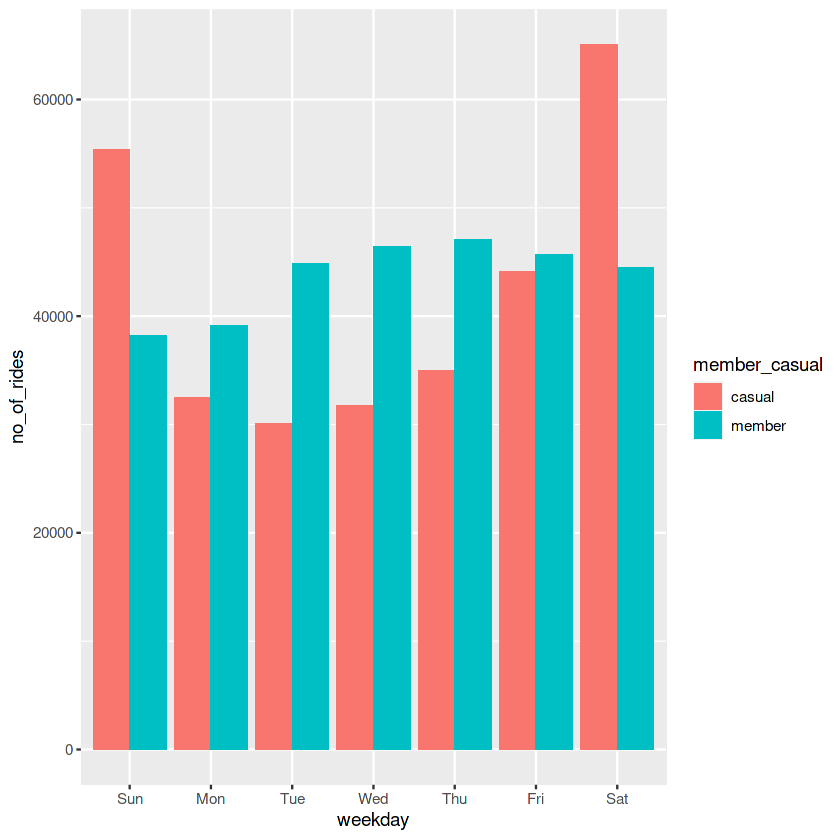

In [16]:
clean_df %>%
  mutate(weekday = wday(started_at, label = TRUE)) %>%
  group_by(member_casual, weekday) %>%
  summarise(no_of_rides = n(),
            ride_avg_duration = mean(ride_length)) %>%
  arrange(member_casual, weekday) %>%
  ggplot(aes(x = weekday, y = no_of_rides, fill = member_casual)) + geom_col(position = 'dodge')

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



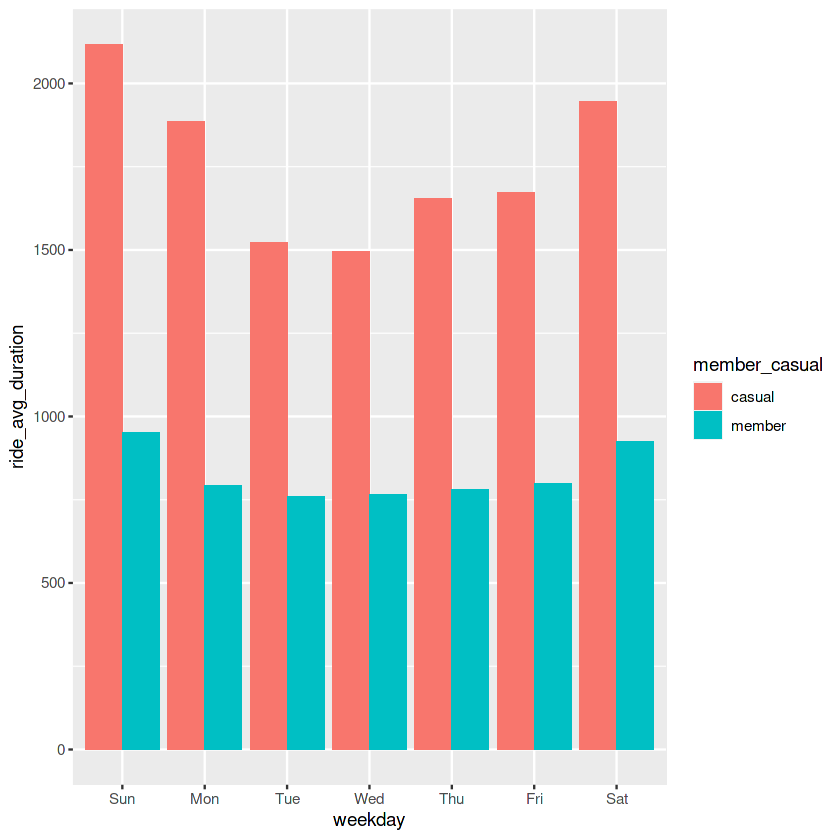

In [17]:
clean_df %>%
  mutate(weekday = wday(started_at, label = TRUE)) %>%
  group_by(member_casual, weekday) %>%
  summarise(no_of_rides = n(),
            ride_avg_duration = mean(ride_length)) %>%
  arrange(member_casual, weekday) %>%
  ggplot(aes(x = weekday, y = ride_avg_duration, fill = member_casual)) + geom_col(position = 'dodge')

From the aboe two visuals it has become very clear that casul riders are using bikes more on saturday, sunday and friday and have lesser number of rides with greater duration of rides.

Now, we will calculate total number of monthly rides by rider type and we will save it for future analysis

In [18]:
month_summary <- clean_df %>%
  mutate(month = month(started_at, label = TRUE)) %>%
  group_by(member_casual, month) %>%
  summarise(no_of_rides = n(),
            ride_avg_duration = mean(ride_length)) %>%
  arrange(member_casual, month)
write_csv(month_summary, "Averge_no_of_monthly_rides_ by_rider_type.csv")

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



Finding stations mostly used by each rider type and than saving it for futur analysis

In [19]:
station_summary <- clean_df %>%
  mutate(station = start_station_name) %>%
  drop_na(start_station_name) %>%
  group_by(station, member_casual) %>%
  summarise(no_of_rides = n()) %>%
  arrange(no_of_rides)
write_csv(station_summary, "Station_summary.csv")

`summarise()` has grouped output by 'station'. You can override using the `.groups` argument.



# Phase 5: Sharing

This is the phase in which the data analyst share his insights which he has gotten through detail analysis of the data. In this step he present it to stakeholders using visuals and key points that are easily understandable by stakeholders.

# Phase 6: Acting

This is the step in which the stakeholders after looking at the data that was shared with them decided to take necessary steps to overcome the problem at hand.

Looking at the above analysis we can easily say that.

  * That actual members take more number of rides with lesser duration, while casual riders take less rides with longer duration.

  * Casual riders rides duration are greater than actual members on each weekdays, but they are more active on weekends where they take more rides and for longer duration.

  * Casual riders often uses bike rides for sports activities.

Finally, the recommendations that I will make based on above findings are given below.
  * The bike share company should introduce riding packages for sports activities, weekends parties, for summer and school events and offer special discounts on these events to convince casual riders to buy or subscribe to annual membership.
  * Also, the bike share company could introduce seasonal or monthly packages, that will increase the interest of casual riders to subscribe to these packages as they will have more options.
  * And presenting the casual riders with amazing promotions at busiest times. Like weekends or months like June and July.